# Count RCM acquisitions
Example of downloading historical RCM acquisition data from canada.ca

In [28]:
import sys
!{sys.executable} -m pip install httpx pandas beautifulsoup4 python-dateutil


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


## Import dependencies

In [30]:
import httpx
import pandas as pd
import geopandas as gpd
from shapely import wkt
from bs4 import BeautifulSoup
from dateutil.parser import parse

## Url to fetch csv files

In [3]:
ftp_url = "https://ftp.maps.canada.ca/pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV/"

## Download RCM acquisition csv file locations

In [4]:
with httpx.Client(timeout=10) as client:
    response = client.get(ftp_url)
    response.raise_for_status()

In [5]:
soup = BeautifulSoup(response.read())
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">

<html>
<head>
<title>Index of /pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV</title>
</head>
<body>
<h1>Index of /pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV</h1>
<table>
<tr><th valign="top"><img alt="[ICO]" src="/icons/blank.gif"/></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr>
<tr><th colspan="5"><hr/></th></tr>
<tr><td valign="top"><img alt="[PARENTDIR]" src="/icons/back.gif"/></td><td><a href="/pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/">Parent Directory</a> </td><td> </td><td align="right">  - </td><td> </td></tr>
<tr><td valign="top"><img alt="[TXT]" src="/icons/text.gif"/></td><td><a href="2021-11_radarsat_constellation_mission.csv">2021-11_ra

## These are the available csv files

In [6]:
hrefs = [item["href"] for item in soup.find_all("a", href=True) if item["href"].endswith(".csv")]
print(f"There are {len(hrefs)} acquisition datasets available.")
hrefs

There are 15 acquisition datasets available.


['2021-11_radarsat_constellation_mission.csv',
 '2021-12_radarsat_constellation_mission.csv',
 '2022-01_radarsat_constellation_mission.csv',
 '2022-02_radarsat_constellation_mission.csv',
 '2022-03_radarsat_constellation_mission.csv',
 '2022-04_radarsat_constellation_mission.csv',
 '2022-05_radarsat_constellation_mission.csv',
 '2022-06_radarsat_constellation_mission.csv',
 '2022-07_radarsat_constellation_mission.csv',
 '2022-08_radarsat_constellation_mission.csv',
 '2022-09_radarsat_constellation_mission.csv',
 '2022-10_radarsat_constellation_mission.csv',
 '2022-11_radarsat_constellation_mission.csv',
 '2022-12_radarsat_constellation_mission.csv',
 '2023-01_radarsat_constellation_mission.csv']

## Explore a single dataset
Let's explore a single dataset. Here we create the url for the first dataset and read it into a Pandas DataFrame. Pandas is a core library for wxploring tabular data in the Python data science community.

In [9]:
href = hrefs[0]
href_url = f"{ftp_url}{href}"
href_url

'https://ftp.maps.canada.ca/pub/csa_asc/Space-technology_Technologie-spatiale/radarsat_constellation_mission_plan/Archives/CSV/2021-11_radarsat_constellation_mission.csv'

## Pandas can read directly from a url

In [10]:
df = pd.read_csv(href_url)
df

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,WKT
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T03:20:23,2021-11-26T03:21:03,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((23.16394 70.34542,23.15421 70...."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-24T03:05:29,2021-11-24T03:05:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((21.68232 74.49756,21.59794 74...."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-23T02:12:11,2021-11-23T02:15:01,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((83.57274 76.85409,83.45535 76...."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-17T06:08:03,2021-11-17T06:08:58,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((143.62843 79.51335,143.52666 7..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-11T02:13:26,2021-11-11T02:13:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((76.08469 72.62348,76.02182 72...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-64.95985 48.16157,-64.96831 4..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654,-82.48366 4..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-69.40456 48.28339,-69.40761 4..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654,-82.48281 4..."


## Convert to a Geopandas GeoDataFrame
A Geopandas GeoDataFrame is a Pandas DataFrame, but with a geometry column. The geometry column allows to do spatial things, like intersects, contains, envelopes, etc.

In [11]:
df['geometry'] = df.WKT.apply(wkt.loads)
df.drop('WKT', axis=1, inplace=True)
df

/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:387: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:388: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shape

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T03:20:23,2021-11-26T03:21:03,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((23.16394 70.34542, 23.15421 70.3538..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-24T03:05:29,2021-11-24T03:05:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((21.68232 74.49756, 21.59794 74.5477..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-23T02:12:11,2021-11-23T02:15:01,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((83.57274 76.85409, 83.45535 76.8042..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-17T06:08:03,2021-11-17T06:08:58,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((143.62843 79.51335, 143.52666 79.53..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-11T02:13:26,2021-11-11T02:13:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"(POLYGON ((76.08469 72.62348, 76.02182 72.5763..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"(POLYGON ((-64.95985 48.16157, -64.96831 48.19..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"(POLYGON ((-82.48094 42.92654, -82.48366 42.93..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"(POLYGON ((-69.40456 48.28339, -69.40761 48.27..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"(POLYGON ((-82.48094 42.92654, -82.48281 42.93..."


## Here is the GeoDataFrame

In [19]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T03:20:23,2021-11-26T03:21:03,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((23.16394 70.34542, 23.15421 70..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-24T03:05:29,2021-11-24T03:05:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((21.68232 74.49756, 21.59794 74..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-23T02:12:11,2021-11-23T02:15:01,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((83.57274 76.85409, 83.45535 76..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-17T06:08:03,2021-11-17T06:08:58,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((143.62843 79.51335, 143.52666 ..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-11T02:13:26,2021-11-11T02:13:34,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((76.08469 72.62348, 76.02182 72..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-64.95985 48.16157, -64.96831 ..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48366 ..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-69.40456 48.28339, -69.40761 ..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48281 ..."


## Geometry of Canada
We want to filter only RCM aquisitions that intersect with Canada. As an approximation, we can use the `natrualearth_lowres` dataset included in GeoPandas.

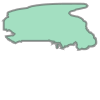

In [82]:
canada_url = "https://storage.googleapis.com/c-core-labs-public/canada-eez.zip"
canada = gpd.read_file(canada_url)
canada = canada.to_crs(epsg=4326)
canada = canada.geometry.iloc[0]
canada

## Filter by intersection with Canada

In [21]:
rcm_canada = gdf[gdf.intersects(canada)]
rcm_canada

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry
17,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-14T08:14:29,2021-11-14T08:14:46,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-103.89901 83.63892, -104.2914..."
18,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-29T03:53:20,2021-11-29T03:53:37,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-125.54906 74.90046, -125.5511..."
30,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-20T02:40:47,2021-11-20T02:41:04,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-106.57217 75.38140, -106.6635..."
53,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T12:13:20,2021-11-26T12:13:37,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-34.00995 83.03955, -34.07595 ..."
87,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2021-11-26T01:50:23,2021-11-26T01:50:52,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-70.00110 81.90847, -70.02703 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-64.95985 48.16157, -64.96831 ..."
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48366 ..."
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-69.40456 48.28339, -69.40761 ..."
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48281 ..."


In [22]:
rcm_canada.columns

Index(['SATID', 'BEAMTYPE_EN', 'BEAMTYPE_FR', 'BEAMID', 'POLTYPE_EN',
       'POLTYPE_FR', 'TXPOL', 'RXPOL', 'CCD_EN', 'CCD_FR', 'EXACTCCD_EN',
       'EXACTCCD_FR', 'UTC_STRT', 'UTC_END', 'PRODTYPE_EN', 'PRODTYPE_FR',
       'BAQ', 'RADARMD', 'geometry'],
      dtype='object')

In [32]:
rcm_canada["UTC_STRT"]

17       2021-11-14T08:14:29
18       2021-11-29T03:53:20
30       2021-11-20T02:40:47
53       2021-11-26T12:13:20
87       2021-11-26T01:50:23
                ...         
18029    2021-11-25T10:04:50
18030    2021-11-23T11:23:49
18031    2021-11-10T10:47:30
18032    2021-11-11T11:23:49
18033    2021-11-07T10:52:11
Name: UTC_STRT, Length: 10707, dtype: object

In [26]:
rcm_canada["UTC_END"]

17       2021-11-14T08:14:46
18       2021-11-29T03:53:37
30       2021-11-20T02:41:04
53       2021-11-26T12:13:37
87       2021-11-26T01:50:52
                ...         
18029    2021-11-25T10:04:53
18030    2021-11-23T11:23:52
18031    2021-11-10T10:47:33
18032    2021-11-11T11:23:52
18033    2021-11-07T10:52:14
Name: UTC_END, Length: 10707, dtype: object

In [33]:
start = rcm_canada["UTC_STRT"].iloc[0]
start

'2021-11-14T08:14:29'

In [34]:
parse(start)

datetime.datetime(2021, 11, 14, 8, 14, 29)

In [35]:
end = rcm_canada["UTC_END"].iloc[0]
end

'2021-11-14T08:14:46'

In [36]:
parse(end)

datetime.datetime(2021, 11, 14, 8, 14, 46)

In [48]:
duration = parse(end) - parse(start)
duration

datetime.timedelta(seconds=17)

In [49]:
duration.seconds

17

In [50]:
(parse(end) - parse(start)).seconds

17

In [42]:
rcm_canada["start"] = rcm_canada["UTC_STRT"].apply(lambda item: parse(item))
rcm_canada["end"] = rcm_canada["UTC_END"].apply(lambda item: parse(item))

/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/jhetzel/.cache/pypoetry/virtualenvs/notebooks-jou60wtj-py3.10/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [54]:
rcm_canada["duration"] = rcm_canada["end"] - rcm_canada["start"]
rcm_canada["duration"] = rcm_canada["duration"].apply(lambda item: item.seconds)

In [55]:
rcm_canada

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,...,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,geometry,start,end,duration
17,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2021-11-14T08:14:29,2021-11-14T08:14:46,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-103.89901 83.63892, -104.2914...",2021-11-14 08:14:29,2021-11-14 08:14:46,17
18,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2021-11-29T03:53:20,2021-11-29T03:53:37,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-125.54906 74.90046, -125.5511...",2021-11-29 03:53:20,2021-11-29 03:53:37,17
30,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2021-11-20T02:40:47,2021-11-20T02:41:04,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-106.57217 75.38140, -106.6635...",2021-11-20 02:40:47,2021-11-20 02:41:04,17
53,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2021-11-26T12:13:20,2021-11-26T12:13:37,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-34.00995 83.03955, -34.07595 ...",2021-11-26 12:13:20,2021-11-26 12:13:37,17
87,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2021-11-26T01:50:23,2021-11-26T01:50:52,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON (((-70.00110 81.90847, -70.02703 ...",2021-11-26 01:50:23,2021-11-26 01:50:52,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18029,RCM-3,Spotlight,Spotlight,FSL15,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2021-11-25T10:04:50,2021-11-25T10:04:53,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-64.95985 48.16157, -64.96831 ...",2021-11-25 10:04:50,2021-11-25 10:04:53,3
18030,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2021-11-23T11:23:49,2021-11-23T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48366 ...",2021-11-23 11:23:49,2021-11-23 11:23:52,3
18031,RCM-3,Spotlight,Spotlight,FSL25,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2021-11-10T10:47:30,2021-11-10T10:47:33,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON (((-69.40456 48.28339, -69.40761 ...",2021-11-10 10:47:30,2021-11-10 10:47:33,3
18032,RCM-3,Spotlight,Spotlight,FSL23,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2021-11-11T11:23:49,2021-11-11T11:23:52,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON (((-82.48094 42.92654, -82.48281 ...",2021-11-11 11:23:49,2021-11-11 11:23:52,3


In [58]:
rcm_canada[["SATID", "duration"]].groupby("SATID").agg(["mean", "min", "max"])

duration         
            mean min  max
SATID                    
RCM-1  34.241605   3  326
RCM-2  35.501819   3  428
RCM-3  34.905249   3  470

In [64]:
rcm_canada[["RADARMD", "duration"]].groupby("RADARMD").agg({"RADARMD": "count", "duration": ["median", "mean", "min", "max", "sum"]})

RADARMD duration                            
                      count   median       mean min  max     sum
RADARMD                                                         
ScanSAR                9895     18.0  37.118545   3  470  367288
Spotlight                48      3.0   3.270833   3    4     157
Stripmap Burst            4      9.0   9.500000   8   12      38
Stripmap Continuous     760      5.0   7.956579   3   66    6047

In [65]:
rcm_canada[["SATID", "duration"]].groupby("SATID").agg({"SATID": "count", "duration": ["median", "mean", "min", "max", "sum"]})

SATID duration                            
      count   median       mean min  max     sum
SATID                                           
RCM-1  3514     17.0  34.241605   3  326  120325
RCM-2  3573     17.0  35.501819   3  428  126848
RCM-3  3620     17.0  34.905249   3  470  126357

## Total number of RCM acquisitions

In [66]:
len(rcm_canada)

10707

## Counts by satellite ID

In [67]:
rcm_canada["SATID"].value_counts()

RCM-3    3620
RCM-2    3573
RCM-1    3514
Name: SATID, dtype: int64

## Counts by radar mode

In [68]:
rcm_canada["RADARMD"].value_counts()

ScanSAR                9895
Stripmap Continuous     760
Spotlight                48
Stripmap Burst            4
Name: RADARMD, dtype: int64

## List of columns to summarize

In [69]:
summarize_columns = ['SATID', 'BEAMTYPE_EN', 'BEAMID', 'POLTYPE_EN', 'TXPOL', 'RXPOL', 'CCD_EN', 'EXACTCCD_EN', 'PRODTYPE_EN', 'BAQ', 'RADARMD']
summarize_columns

['SATID',
 'BEAMTYPE_EN',
 'BEAMID',
 'POLTYPE_EN',
 'TXPOL',
 'RXPOL',
 'CCD_EN',
 'EXACTCCD_EN',
 'PRODTYPE_EN',
 'BAQ',
 'RADARMD']

## Counts of all columns to summarize

In [72]:
for column in summarize_columns:
    print(column)
    print(rcm_canada[[column, "duration"]].groupby(column).agg({column: "count", "duration": ["median", "mean", "min", "max", "sum"]}))
    print()
    print()

SATID
      SATID duration                            
      count   median       mean min  max     sum
SATID                                           
RCM-1  3514     17.0  34.241605   3  326  120325
RCM-2  3573     17.0  35.501819   3  428  126848
RCM-3  3620     17.0  34.905249   3  470  126357


BEAMTYPE_EN
                        BEAMTYPE_EN duration                            
                              count   median       mean min  max     sum
BEAMTYPE_EN                                                             
High Resolution 5m              248      6.0   7.237903   3   31    1795
Low Noise                      1284     13.0  17.336449   3  186   22260
Low Resolution 100m              95     20.0  37.684211   5  209    3580
Medium Resolution 16m           215     10.0  13.302326   3   66    2860
Medium Resolution 30m          1635     12.0  22.368807   4  251   36573
Medium Resolution 50m          6881     23.0  44.306787   4  470  304875
Quad-Polarization            

## Now, let's download all data frames from 2022

In [73]:
hrefs_2022 = [href for href in hrefs if href.startswith("2022")]
hrefs_2022

['2022-01_radarsat_constellation_mission.csv',
 '2022-02_radarsat_constellation_mission.csv',
 '2022-03_radarsat_constellation_mission.csv',
 '2022-04_radarsat_constellation_mission.csv',
 '2022-05_radarsat_constellation_mission.csv',
 '2022-06_radarsat_constellation_mission.csv',
 '2022-07_radarsat_constellation_mission.csv',
 '2022-08_radarsat_constellation_mission.csv',
 '2022-09_radarsat_constellation_mission.csv',
 '2022-10_radarsat_constellation_mission.csv',
 '2022-11_radarsat_constellation_mission.csv',
 '2022-12_radarsat_constellation_mission.csv']

In [74]:
data_frames = [pd.read_csv(f"{ftp_url}{href}") for href in hrefs_2022]

## Concatenate into a single DataFrame

In [79]:
data_frame = pd.concat(data_frames, ignore_index=True)
data_frame

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,EXACTCCD_EN,EXACTCCD_FR,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,WKT
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T14:32:27,2022-01-07T14:33:32,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((33.76464 71.65086,33.75449 71.6..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T06:34:15,2022-01-07T06:34:35,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((88.77929 83.95602,88.2853 83.96..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-01T12:17:04,2022-01-01T12:17:38,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((-76.0494 71.60009,-76.08724 71...."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-07T01:39:04,2022-01-07T01:44:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((-129.26334 67.77868,-129.28291 ..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,False,FAUX,2022-01-25T17:10:57,2022-01-25T17:12:21,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,"MULTIPOLYGON(((-159.13989 56.1851,-159.15201 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203997,RCM-3,Spotlight,Spotlight,FSLCP10,Compact Polarization,Polarisation compacte,C,H+V,True,VRAI,False,FAUX,2022-12-23T00:52:51,2022-12-23T00:52:54,SLC - 32bit,SLC - 32bits,2 bit,Spotlight,"MULTIPOLYGON(((-120.34514 73.62836,-120.38282 ..."
203998,RCM-3,Spotlight,Spotlight,FSL6,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-19T22:44:14,2022-12-19T22:44:17,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON(((-75.49371 44.71055,-75.49496 44..."
203999,RCM-3,Spotlight,Spotlight,FSL20,Single Polarization,Polarisation simple,H,H,False,FAUX,False,FAUX,2022-12-17T10:58:13,2022-12-17T10:58:16,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,"MULTIPOLYGON(((110.40729 -7.5458,110.40451 -7...."
204000,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,True,VRAI,2022-12-06T22:36:41,2022-12-06T22:36:45,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,"MULTIPOLYGON(((-71.18898 46.89148,-71.20061 46..."


## Add duration column

In [80]:
data_frame["start"] = data_frame["UTC_STRT"].apply(lambda item: parse(item))
data_frame["end"] = data_frame["UTC_END"].apply(lambda item: parse(item))
data_frame["duration"] = data_frame["end"] - data_frame["start"]
data_frame["duration"] = data_frame["duration"].apply(lambda item: item.seconds)

## Convert to a single GeoDataFrame

In [81]:
data_frame['geometry'] = data_frame.WKT.apply(wkt.loads)
data_frame.drop('WKT', axis=1, inplace=True)
geo_data_frame = gpd.GeoDataFrame(data_frame, geometry='geometry')
geo_data_frame

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,...,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,start,end,duration,geometry
0,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-07T14:32:27,2022-01-07T14:33:32,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-07 14:32:27,2022-01-07 14:33:32,65,"MULTIPOLYGON (((33.76464 71.65086, 33.75449 71..."
1,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-07T06:34:15,2022-01-07T06:34:35,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-07 06:34:15,2022-01-07 06:34:35,20,"MULTIPOLYGON (((88.77929 83.95602, 88.28530 83..."
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-01T12:17:04,2022-01-01T12:17:38,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-01 12:17:04,2022-01-01 12:17:38,34,"MULTIPOLYGON (((-76.04940 71.60009, -76.08724 ..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-07T01:39:04,2022-01-07T01:44:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-07 01:39:04,2022-01-07 01:44:41,337,"MULTIPOLYGON (((-129.26334 67.77868, -129.2829..."
4,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-25T17:10:57,2022-01-25T17:12:21,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-25 17:10:57,2022-01-25 17:12:21,84,"MULTIPOLYGON (((-159.13989 56.18510, -159.1520..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203997,RCM-3,Spotlight,Spotlight,FSLCP10,Compact Polarization,Polarisation compacte,C,H+V,True,VRAI,...,2022-12-23T00:52:51,2022-12-23T00:52:54,SLC - 32bit,SLC - 32bits,2 bit,Spotlight,2022-12-23 00:52:51,2022-12-23 00:52:54,3,"MULTIPOLYGON (((-120.34514 73.62836, -120.3828..."
203998,RCM-3,Spotlight,Spotlight,FSL6,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2022-12-19T22:44:14,2022-12-19T22:44:17,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,2022-12-19 22:44:14,2022-12-19 22:44:17,3,"MULTIPOLYGON (((-75.49371 44.71055, -75.49496 ..."
203999,RCM-3,Spotlight,Spotlight,FSL20,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2022-12-17T10:58:13,2022-12-17T10:58:16,SLC - 32bit,SLC - 32bits,3 bit,Spotlight,2022-12-17 10:58:13,2022-12-17 10:58:16,3,"MULTIPOLYGON (((110.40729 -7.54580, 110.40451 ..."
204000,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2022-12-06T22:36:41,2022-12-06T22:36:45,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,2022-12-06 22:36:41,2022-12-06 22:36:45,4,"MULTIPOLYGON (((-71.18898 46.89148, -71.20061 ..."


## Intersect with Canada

In [83]:
geo_data_frame_canada = geo_data_frame[geo_data_frame.intersects(canada)]
geo_data_frame_canada

,SATID,BEAMTYPE_EN,BEAMTYPE_FR,BEAMID,POLTYPE_EN,POLTYPE_FR,TXPOL,RXPOL,CCD_EN,CCD_FR,...,UTC_STRT,UTC_END,PRODTYPE_EN,PRODTYPE_FR,BAQ,RADARMD,start,end,duration,geometry
2,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-01T12:17:04,2022-01-01T12:17:38,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-01 12:17:04,2022-01-01 12:17:38,34,"MULTIPOLYGON (((-76.04940 71.60009, -76.08724 ..."
3,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-07T01:39:04,2022-01-07T01:44:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-07 01:39:04,2022-01-07 01:44:41,337,"MULTIPOLYGON (((-129.26334 67.77868, -129.2829..."
6,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-31T16:16:17,2022-01-31T16:19:08,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-31 16:16:17,2022-01-31 16:19:08,171,"MULTIPOLYGON (((-122.72637 78.60944, -122.8875..."
16,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-19T13:03:06,2022-01-19T13:06:41,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-19 13:03:06,2022-01-19 13:06:41,215,"MULTIPOLYGON (((-73.15615 78.99974, -73.22956 ..."
21,RCM-1,Low Resolution 100m,Faible résolution 100m,SC100MA,Dual Co/Cross Polarization,Copolarisation double croisée,H,H+V,False,FAUX,...,2022-01-19T16:16:54,2022-01-19T16:18:16,GRD - 16bit,GRD - 16bits,3 bit,ScanSAR,2022-01-19 16:16:54,2022-01-19 16:18:16,82,"MULTIPOLYGON (((-127.98931 76.68200, -128.0791..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203996,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2022-12-13T12:39:47,2022-12-13T12:39:51,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,2022-12-13 12:39:47,2022-12-13 12:39:51,4,"MULTIPOLYGON (((-97.01166 49.79291, -97.02300 ..."
203997,RCM-3,Spotlight,Spotlight,FSLCP10,Compact Polarization,Polarisation compacte,C,H+V,True,VRAI,...,2022-12-23T00:52:51,2022-12-23T00:52:54,SLC - 32bit,SLC - 32bits,2 bit,Spotlight,2022-12-23 00:52:51,2022-12-23 00:52:54,3,"MULTIPOLYGON (((-120.34514 73.62836, -120.3828..."
203998,RCM-3,Spotlight,Spotlight,FSL6,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2022-12-19T22:44:14,2022-12-19T22:44:17,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,2022-12-19 22:44:14,2022-12-19 22:44:17,3,"MULTIPOLYGON (((-75.49371 44.71055, -75.49496 ..."
204000,RCM-3,Spotlight,Spotlight,FSL24,Single Polarization,Polarisation simple,H,H,False,FAUX,...,2022-12-06T22:36:41,2022-12-06T22:36:45,SLC - 16bit,SLC - 16bits,3 bit,Spotlight,2022-12-06 22:36:41,2022-12-06 22:36:45,4,"MULTIPOLYGON (((-71.18898 46.89148, -71.20061 ..."


## Summary statistics

In [84]:
for column in summarize_columns:
    print(column)
    print(rcm_canada[[column, "duration"]].groupby(column).agg({column: "count", "duration": ["median", "mean", "min", "max", "sum"]}))
    print()

SATID
      SATID duration                            
      count   median       mean min  max     sum
SATID                                           
RCM-1  3514     17.0  34.241605   3  326  120325
RCM-2  3573     17.0  35.501819   3  428  126848
RCM-3  3620     17.0  34.905249   3  470  126357

BEAMTYPE_EN
                        BEAMTYPE_EN duration                            
                              count   median       mean min  max     sum
BEAMTYPE_EN                                                             
High Resolution 5m              248      6.0   7.237903   3   31    1795
Low Noise                      1284     13.0  17.336449   3  186   22260
Low Resolution 100m              95     20.0  37.684211   5  209    3580
Medium Resolution 16m           215     10.0  13.302326   3   66    2860
Medium Resolution 30m          1635     12.0  22.368807   4  251   36573
Medium Resolution 50m          6881     23.0  44.306787   4  470  304875
Quad-Polarization             